<a href="https://colab.research.google.com/github/ilman79/predict_salary_Indonesia/blob/main/Predict_salary_Indonesia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


{}

In [2]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d adityakadiwal/water-potability

water-potability.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip water-potability.zip

Archive:  water-potability.zip
replace water_potability.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: water_potability.csv    


#Loading Data

`Data yang akan digunakan yaitu data water_potability yang bersumber dari kaggel`
[dataset](https://www.kaggle.com/datasets/adityakadiwal/water-potability)

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv("water_potability.csv")
dataset

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


# Explanatory Data Analysis Cleaning Data

`Pertanyaan untuk mengetahui karakteristik data maka ada pertanyaan untuk Explanatory Data Analysis yaitu `

*   `Apa Saja jenis variabel pada dataset`
*   `Apakah ada missing value dan duplikasi pada dataset`
*   `Bagaimana distribusi variabel dataset`
*   `Bagaimana korelasi antar data`

> **Import Libarary**



In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
dataset.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [58]:
from numpy import NaN
dataset.loc[dataset[['ph', 'Sulfate','Trihalomethanes']].isna().any(axis=1)]

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability



`Dikarenakan pada variabel **ph**,**Sulfate**, dan **Trihalomethanes** masing-masing memiliki dampak pada pengunaan air dan kelayakan air yang akan kita konsumsi maka dari itu, ketiga variabel tersebut kita isi nilai NaNnya dengan rata-rata pada variabel masing-masing.`











> **Mengisi nilai NaN dengan rata-rata**



In [59]:
dataset.ph.fillna(value=dataset.ph.mean(), inplace=True)
dataset.Sulfate.fillna(value=dataset.Sulfate.mean(), inplace=True)
dataset.Trihalomethanes.fillna(value=dataset.Trihalomethanes.mean(), inplace=True)

`Kemudian kita akan cek kembali untuk memastikan tidak ada nilai yang NaN`

In [60]:
dataset.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

`Setelah kita inputkan semua nilai NaN ph dengan rata-rata maka hasilnya nilai NaN adalah 0`



> **Mengecek adanya outlier pada data**





`Dilakukan pengecekan outlier data berguna agar tidak terjadi bias saat analysis berlangsung`

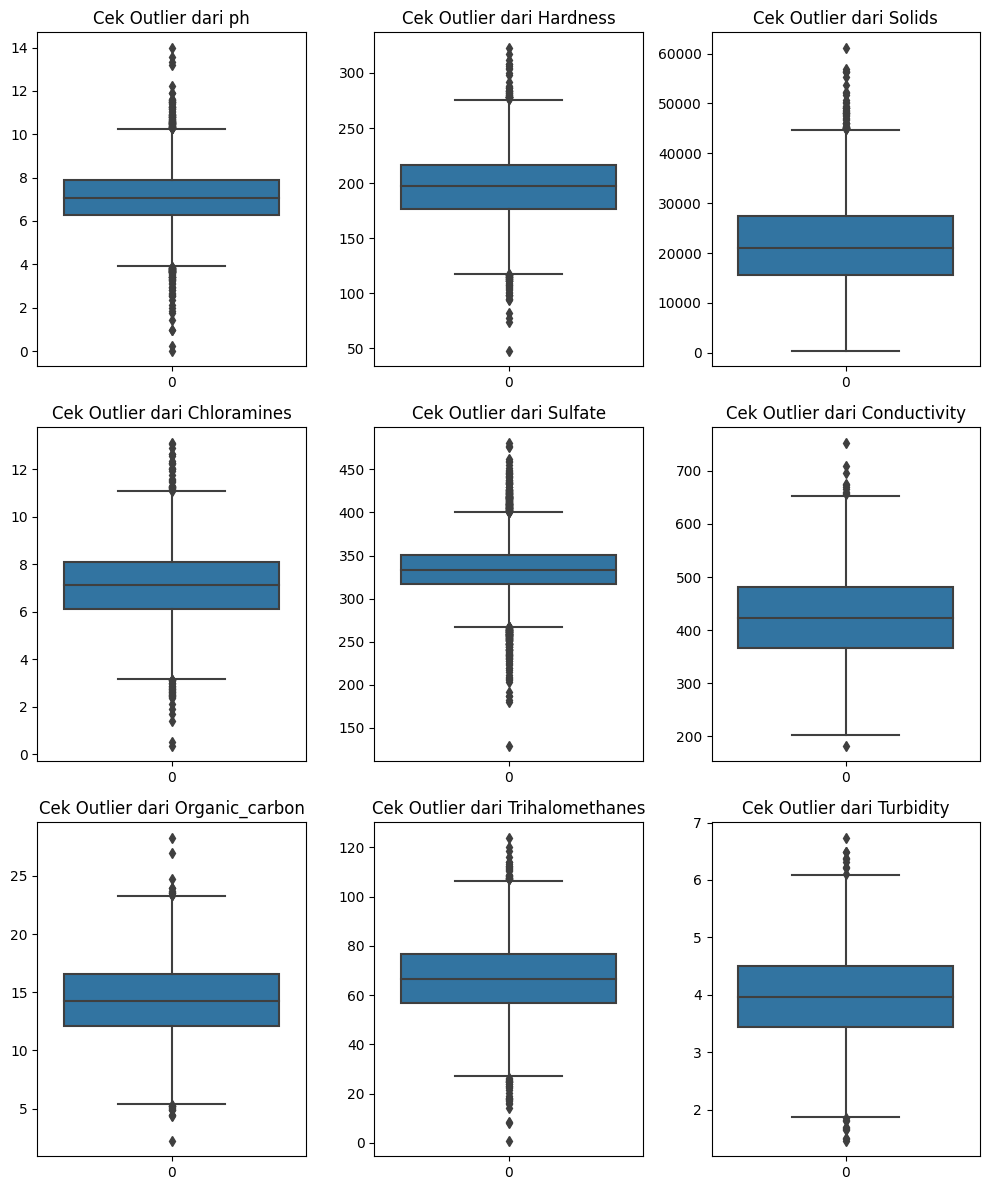

In [61]:
# Menghitung berapa banyak variabel yang akan divisualisasikan dalam satu baris
num_columns = len(dataset.columns)-1

# Menghitung berapa banyak kolom yang akan digunakan
num_cols_per_row = 3  # Anda dapat mengganti jumlah kolom per baris sesuai keinginan

# Menghitung berapa banyak baris yang diperlukan
num_rows = int(np.ceil(num_columns / num_cols_per_row))

# Membuat susunan subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(10, 4*num_rows))

# Melooping setiap variabel dan membuat boxplot
for i, column in enumerate(dataset.columns[:-1]):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    sns.boxplot(data=dataset[column], ax=axes[row, col])
    axes[row, col].set_title(f'Cek Outlier dari {column}')

# Mengatur tata letak subplot agar rapi
plt.tight_layout()
plt.show()


`Dilihat dari hasil diagram boxplot, beberapa data merupakan outlier sehingga dilakukan normalisasi untuk membersihkan data tetapi kita lihat lagi dari data yang kita punya yaitu untuk mengecek kadar kelayakan dari suatu air yaitu kita melihat air dengan kandungan tersebut layak digunakan atau tidak.`





In [62]:
Q1 = (dataset).quantile(0.25)
Q3 = (dataset).quantile(0.75)
IQR = Q3 - Q1

datasets=dataset[~((dataset<(Q1-1.5*IQR))|(dataset>(Q3+1.5*IQR))).any(axis=1)]
datasets.shape

(2666, 10)

`Setelah dilakukan cleaning outlier maka data yang akan kita gunakan dalam proses analisis lebih lanjut yaitu 2666 data`

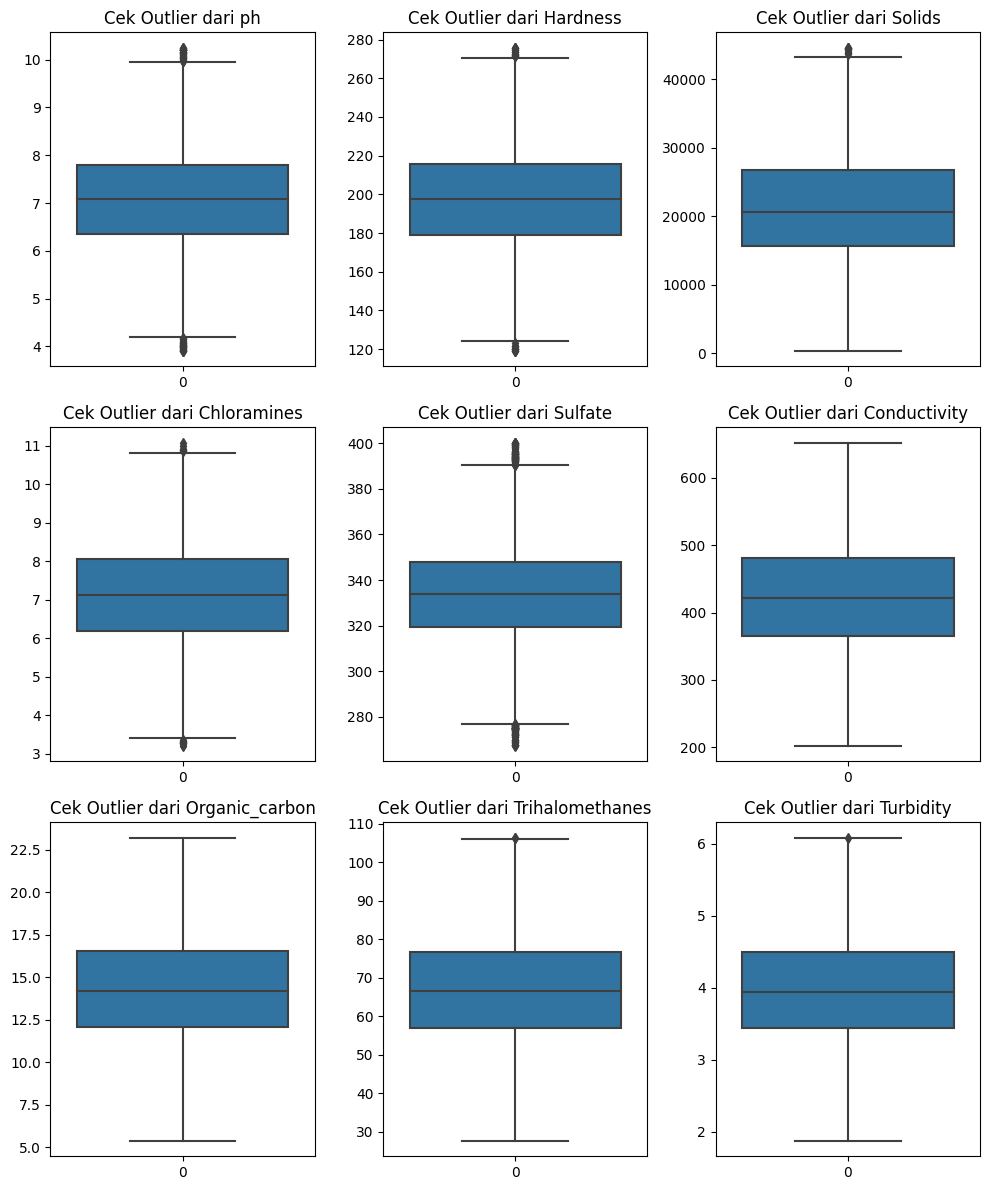

In [63]:
# Menghitung berapa banyak variabel yang akan divisualisasikan dalam satu baris
num_columns = len(datasets.columns)-1

# Menghitung berapa banyak kolom yang akan digunakan
num_cols_per_row = 3  # Anda dapat mengganti jumlah kolom per baris sesuai keinginan

# Menghitung berapa banyak baris yang diperlukan
num_rows = int(np.ceil(num_columns / num_cols_per_row))

# Membuat susunan subplots
fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(10, 4*num_rows))

# Melooping setiap variabel dan membuat boxplot
for i, column in enumerate(datasets.columns[:-1]):
    row = i // num_cols_per_row
    col = i % num_cols_per_row
    sns.boxplot(data=datasets[column], ax=axes[row, col])
    axes[row, col].set_title(f'Cek Outlier dari {column}')

# Mengatur tata letak subplot agar rapi
plt.tight_layout()
plt.show()



> **Mengecek Duplikasi Data**



`Tujuan dilakukan duplikasi data adalah untuk mencegah adanya data yang sama`

In [64]:
dataset.duplicated().sum()

0

`Pada dataset tidak ada data yang duplikat sehingga data sudah bisa dianalisis ketahap selanjutnya.`

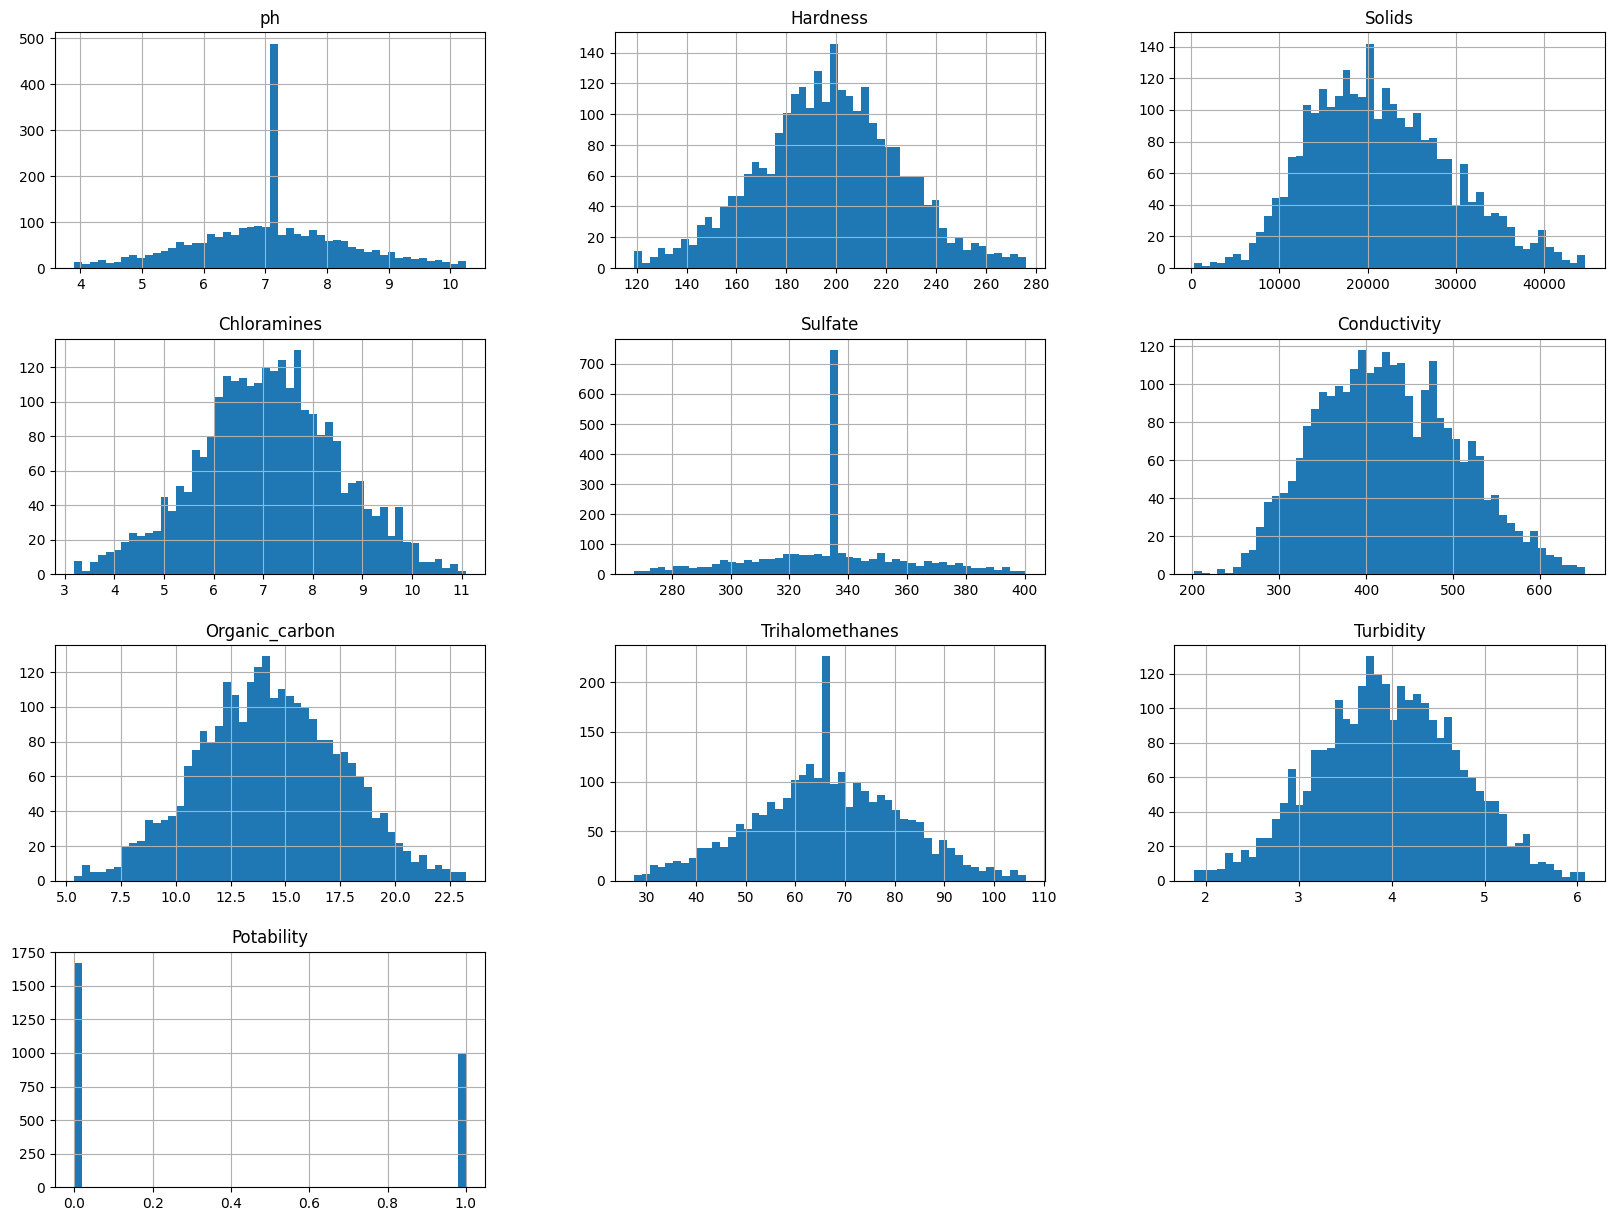

In [65]:
datasets.hist(bins=50, figsize=(20,15))
plt.show()

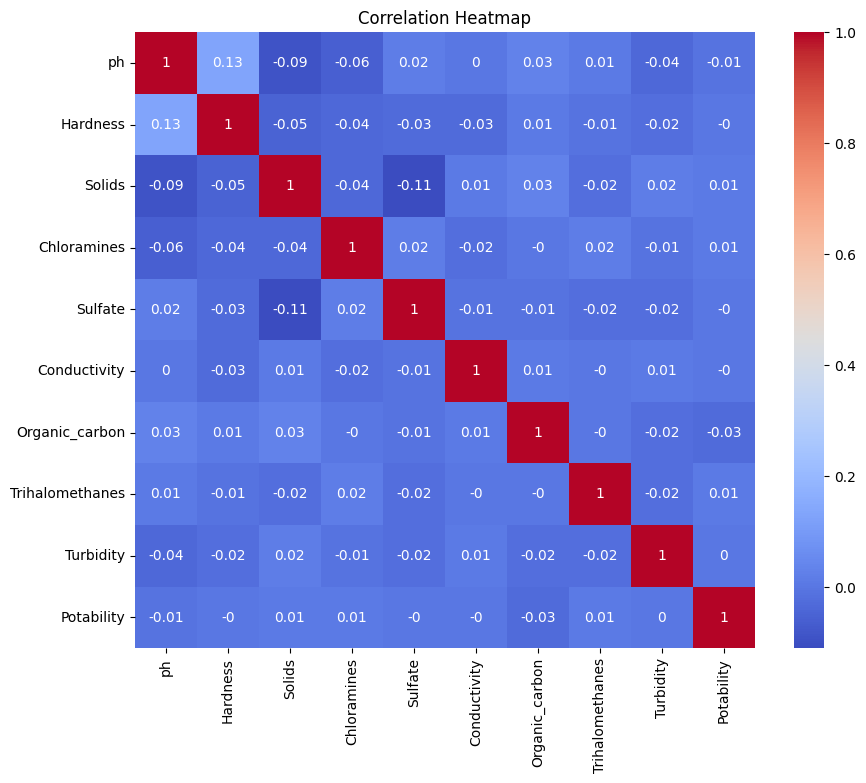

In [66]:
# Menghitung korelasi Pearson antara semua pasangan variabel dalam DataFrame
correlation_matrix = datasets.corr().round(2)

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Data Preperation

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1, random_state=123)
pca_result = pca.fit_transform(datasets.iloc[:, :-1])

In [43]:
pca.explained_variance_ratio_.round(9)


array([0.99987052])

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X = datasets.iloc[:, 0:8]
y = datasets.iloc[:,9]  # Use the target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create and fit the KNeighborsRegressor model
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [74]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [75]:
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)
models

,KNN,RandomForest,Boosting,knn
train_mse,NaN,NaN,NaN,0.212261
test_mse,NaN,NaN,NaN,NaN


In [76]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor

# buat model prediksi
RF = RandomForestRegressor(n_estimators=20, max_depth=16, random_state=25, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [77]:
from sklearn.ensemble import AdaBoostRegressor

boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [78]:
# Lakukan scaling terhadap fitur numerik pada X_test sehingga memiliki rata-rata=0 dan varians=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Calculate mean squared error
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [79]:
# Buat variabel mse yang isinya adalah dataframe nilai mse data train dan test pada masing-masing algoritma
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])

# Buat dictionary untuk setiap algoritma yang digunakan
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}

# Hitung Mean Squared Error masing-masing algoritma pada data train dan test
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
# Panggil mse
mse


,train,test
KNN,0.212261,0.250693
RF,0.061537,0.226092
Boosting,0.223218,0.230699


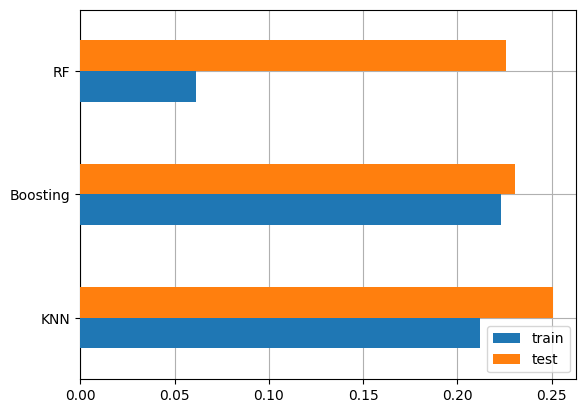

In [80]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [81]:
# Melakukan prediksi pada data uji
y_pred = knn.predict(X_test_scaled)

# Menghitung Mean Squared Error
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.25


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
